In [1]:
# install.packages("tidyverse")
library(ggplot2)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.5      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
myData=read.table(file="arbres-tot.txt",sep=";",skip=3,header=TRUE)
myData=myData[myData$X10!=0,]

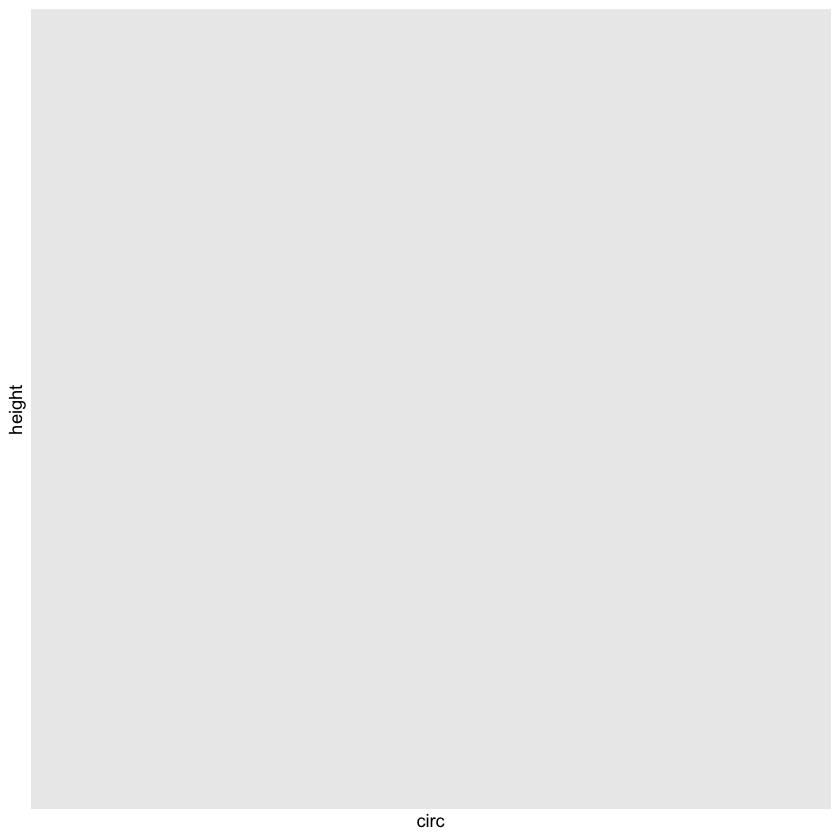

In [3]:
library(tidyverse)
circ=myData$X70
height=myData$X10
ggplot(myData,aes(x=circ,y=height))+ geom_point() + xlab("circ") + ylab("height")

In [4]:
myData

X139255,Arbre,Jardin,PARIS.16E.ARRDT,X,X.1,SQUARE.ROGER.COQUOIN...14.AVENUE.FERDINAND.BUISSON,X000102006,Epicéa,Picea,abies,X.2,X60,X9,Jeune..arbre.Adulte,NON,X6859763.24789.645305.347999
<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
